# Basic Stats Analysis

## Goal of this Analysis
Compute some basic statistics using only player roster data. Player data will be split into Active vs all others.

### Interesing Features
* birthday
* college
* current_status
* current_team
* high_school
* position
* age
* height
* weight
* city
* state
* years_experience

## Questions to Answer
* most common birthday
* most common college
* popular football highschools
* tallest/shortest team
* heaviest/lightest team
* body stats by position
* body stats by city/state
* popular city/state
* distribution of experience

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('data/processed/basic_stats_active.csv', parse_dates=['birthday'])
df.head()

,player_id,birth_place,birthday,college,current_status,current_team,height_inches,high_school,high_school_location,name,number,position,weight_lbs,computed_age,last_name,first_name,years_experience
0,a'shawnrobinson/2555265,"Fort Worth , TX",1995-03-21,Alabama,Active,Detroit Lions,75.0,Arlington Heights HS,"Fort Worth, TX","Robinson, A'Shawn",91.0,DT,320.0,23.0,Robinson,A'Shawn,2.0
1,a.j.bouye/2541162,"Dallas , TX",1991-08-16,Central Florida,Active,Jacksonville Jaguars,72.0,Tucker HS,GA,"Bouye, A.J.",NaN,CB,191.0,27.0,Bouye,A.J.,5.0
2,a.j.cann/2552330,"Bamberg , SC",1991-10-03,South Carolina,Active,Jacksonville Jaguars,75.0,Bamberg-Ehrhardt HS,"Bamberg, SC","Cann, A.J.",60.0,OG,317.0,27.0,Cann,A.J.,3.0
3,a.j.derby/2552580,"Iowa City , IA",1991-09-20,Arkansas,Active,Denver Broncos,77.0,Iowa City HS,IA,"Derby, A.J.",83.0,TE,255.0,27.0,Derby,A.J.,3.0
4,a.j.francis/2541707,"Washington , DC",1990-05-07,Maryland,Active,Washington Redskins,77.0,Gonzaga HS,"Washington, DC","Francis, A.J.",NaN,DT,330.0,28.0,Francis,A.J.,2.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 17 columns):
player_id               2877 non-null object
birth_place             2305 non-null object
birthday                2742 non-null datetime64[ns]
college                 2877 non-null object
current_status          2877 non-null object
current_team            2877 non-null object
height_inches           2877 non-null float64
high_school             2303 non-null object
high_school_location    2299 non-null object
name                    2877 non-null object
number                  1519 non-null float64
position                2877 non-null object
weight_lbs              2877 non-null float64
computed_age            2742 non-null float64
last_name               2877 non-null object
first_name              2877 non-null object
years_experience        2877 non-null float64
dtypes: datetime64[ns](1), float64(5), object(11)
memory usage: 382.2+ KB


In [40]:
# active player count
df.player_id.count()

2877

In [42]:
# active player count by position
df.groupby('position')['player_id'].count().sort_values(ascending=False)

position
WR     377
DE     226
CB     211
DB     204
RB     202
TE     192
LB     192
DT     164
OG     156
OT     129
OLB    121
QB     120
C       90
T       64
ILB     53
SS      53
FS      52
P       46
K       45
G       43
LS      39
NT      29
SAF     25
FB      24
MLB     16
DL       3
OL       1
Name: player_id, dtype: int64

In [7]:
# most common birthday
df.groupby('birthday')['player_id'].count().sort_values(ascending=False).head(1)

birthday
1992-05-13    8
Name: player_id, dtype: int64

8 active players were born on 05/13/1992. Those players are:

In [12]:
print(list(df[df['birthday'] == '1992-05-13']['name']))

['Heeney, Ben', 'DeBord, Clay', 'Campbell, Ibraheim', 'Morgan, Jordan', 'Thompson, Juwan', 'Gunter, LaDarius', 'Havenstein, Rob', 'Mathieu, Tyrann']


In [19]:
# most common college
df.groupby('college')['player_id'].count().sort_values(ascending=False)[:11]

college
LSU              58
Alabama          53
Florida          53
USC              51
Miami (Fla.)     49
Florida State    47
Ohio State       46
Georgia          45
Clemson          44
Utah             42
Auburn           40
Name: player_id, dtype: int64

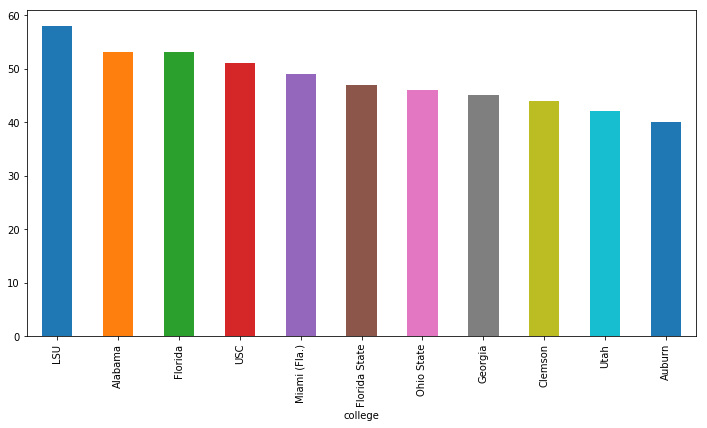

In [18]:
df.groupby('college')['player_id'].count().sort_values(ascending=False)[:11].plot.bar(figsize=(12,6))

Looks like LSU has the most active players in the NFL with 58. Alabama and Florida are right behind them with 53 each.

In [20]:
# top 10 high schools
df.groupby('high_school')['player_id'].count().sort_values(ascending=False)[:11]

high_school
St. Thomas Aquinas HS        15
Central HS                   12
Westlake HS                  11
Booker T. Washington HS       8
Glenville HS                  8
Miami Central HS              7
Gainesville HS                7
Notre Dame HS                 6
Skyline HS                    6
Long Beach Polytechnic HS     6
Glades Central HS             6
Name: player_id, dtype: int64

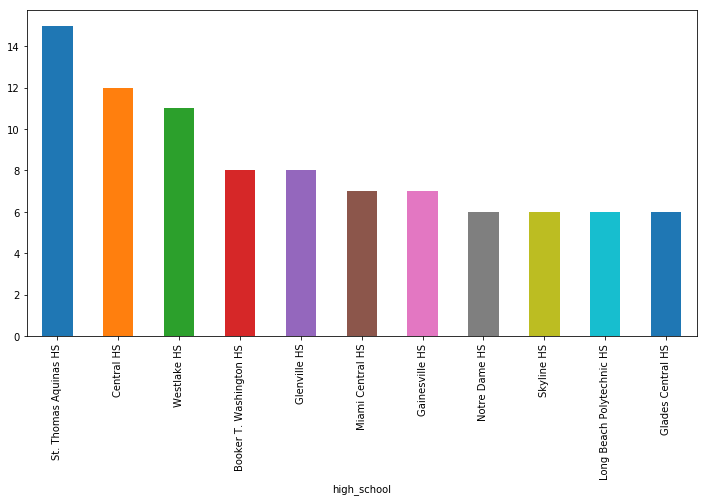

In [21]:
df.groupby('high_school')['player_id'].count().sort_values(ascending=False)[:11].plot.bar(figsize=(12,6))

St. Thomas Aquinas HS in Florida has the most active NFL players with 12. Lets see who they are:

In [23]:
df[df['high_school'] == 'St. Thomas Aquinas HS']['name']

267           Hart, Bobby
308       Linder, Brandon
377            Cox, Bryan
581           Riggs, Cody
904     Southward, Dezmen
1096         Atkins, Geno
1115     Bernard, Giovani
1231         Rudock, Jake
1271         White, James
1426           Bosa, Joey
1894      Gilbert, Marcus
1907     Roberson, Marcus
2034     Palardy, Michael
2221     Dorsett, Phillip
2431           Young, Sam
Name: name, dtype: object

In [30]:
# tallest/shortest teams
df.groupby('current_team')['height_inches'].mean().round(2).sort_values(ascending=False)

current_team
Kansas City Chiefs      74.57
Minnesota Vikings       74.53
Oakland Raiders         74.39
Miami Dolphins          74.36
Carolina Panthers       74.30
Arizona Cardinals       74.24
Tennessee Titans        74.23
Indianapolis Colts      74.23
Houston Texans          74.20
New York Jets           74.20
Denver Broncos          74.18
Pittsburgh Steelers     74.18
Baltimore Ravens        74.14
New York Giants         74.13
Dallas Cowboys          74.11
Detroit Lions           74.10
Washington Redskins     74.10
Seattle Seahawks        74.09
Chicago Bears           74.09
Cincinnati Bengals      74.06
New Orleans Saints      74.03
Buffalo Bills           74.02
Green Bay Packers       74.00
New England Patriots    73.93
Jacksonville Jaguars    73.91
Cleveland Browns        73.90
Atlanta Falcons         73.86
San Francisco 49ers     73.80
Los Angeles Rams        73.73
Los Angeles Chargers    73.65
Philadelphia Eagles     73.61
Tampa Bay Buccaneers    73.60
Name: height_inches, dtype:

In [31]:
# position height
df.groupby('position')['height_inches'].mean().round(2).sort_values(ascending=False)

position
OL     78.00
OT     77.97
T      77.91
TE     76.62
OG     76.31
DE     75.89
G      75.86
C      75.66
QB     75.22
DL     75.00
DT     74.99
LS     74.77
NT     74.66
OLB    74.50
LB     73.93
P      73.91
ILB    73.25
MLB    73.25
SAF    72.80
WR     72.71
FB     72.42
SS     72.08
K      71.89
DB     71.89
FS     71.85
CB     71.64
RB     70.91
Name: height_inches, dtype: float64

In [33]:
# team weight
df.groupby('current_team')['weight_lbs'].mean().round(2).sort_values(ascending=False)

current_team
Carolina Panthers       247.90
Washington Redskins     247.53
Oakland Raiders         246.73
Indianapolis Colts      246.28
Tennessee Titans        246.17
Pittsburgh Steelers     246.08
Dallas Cowboys          245.49
New England Patriots    245.28
Denver Broncos          245.09
Chicago Bears           244.86
New York Jets           244.83
Detroit Lions           244.82
Baltimore Ravens        244.43
New York Giants         243.72
Minnesota Vikings       243.66
Philadelphia Eagles     243.52
Cincinnati Bengals      243.35
Kansas City Chiefs      243.34
Miami Dolphins          243.30
New Orleans Saints      243.08
Cleveland Browns        242.93
Buffalo Bills           242.83
Houston Texans          242.51
Seattle Seahawks        242.20
Jacksonville Jaguars    241.87
Green Bay Packers       241.56
Tampa Bay Buccaneers    241.27
Arizona Cardinals       240.80
San Francisco 49ers     240.59
Los Angeles Chargers    238.82
Los Angeles Rams        238.60
Atlanta Falcons         23

In [34]:
# position weight
df.groupby('position')['weight_lbs'].mean().round(2).sort_values(ascending=False)

position
NT     317.90
T      317.19
G      315.98
OG     312.21
OL     312.00
OT     311.92
DT     305.90
C      302.88
DE     276.95
DL     266.67
TE     251.43
OLB    246.77
LS     243.62
FB     242.42
ILB    237.64
LB     237.12
MLB    236.62
QB     223.22
RB     215.28
P      209.41
SS     208.53
SAF    206.24
FS     204.77
WR     199.26
K      198.36
DB     197.56
CB     193.13
Name: weight_lbs, dtype: float64

In [36]:
# popular birth places
df.groupby('birth_place')['player_id'].count().sort_values(ascending=False)[0:11]

birth_place
Miami , FL           50
Los Angeles , CA     43
Houston , TX         42
Dallas , TX          34
Atlanta , GA         31
New Orleans , LA     23
Cincinnati , OH      23
San Diego , CA       22
Detroit , MI         21
Philadelphia , PA    19
Chicago , IL         19
Name: player_id, dtype: int64

Miami, FL is a common birth place in the NFL with 50 active players coming from there. California and Texas have 65 and 76 active players on the top 10 list.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b3b57f0>]], dtype=object)

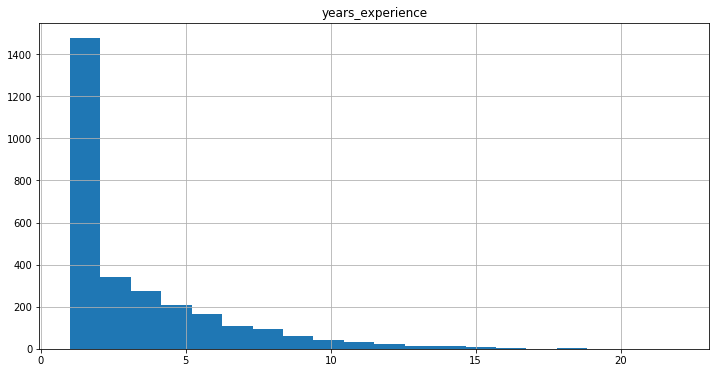

In [39]:
# experience distribution
df.hist('years_experience',bins=20,figsize=(12,6))